Build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.
The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images of 10 different types.This dataset is available directly in the tf.keras.datasets API.

In [2]:
import tensorflow as tf

print(tf.__version__)

2.16.1


In [4]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

In [5]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 29s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


Print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index 42. That's a different boot than the one at index 0.

LABEL: 2

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252 248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230 239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239 230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236 239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235 236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235 235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235 234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 

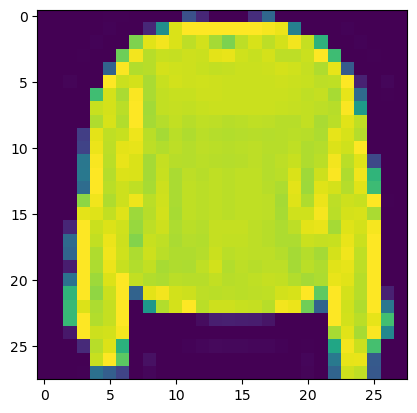

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 7

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

Above number are between 0 and 255. While training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization.

In [8]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Design the model

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, one of them is:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in this classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. 

# Build Model

In [9]:
# Build the classification model
#here 1st layer is input layer in the shape of data(28X28) and output layer in the shape of classes(10 different classes in dataset), Hidden layer with 128 neurons to find rules between them.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),       
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
#Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [11]:
#compile and train the model on training data and check accuracy
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7820 - loss: 0.6330
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8616 - loss: 0.3877
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8782 - loss: 0.3347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8836 - loss: 0.3169
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8889 - loss: 0.2975


In [13]:
# Evaluate the model on unseen data/test data to find loss
loss = model.evaluate(test_images, test_labels)
print("Loss on test data:", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3432
Loss on test data: [0.3471408486366272, 0.8759999871253967]


In [17]:
accuracy = model.evaluate(test_images, test_labels)[0]  # Index 1 corresponds to accuracy if it's the second metric specified during model compilation
print("Accuracy on test data:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3432
Accuracy on test data: 0.3471408486366272


# Test on various cases

compare classifications[0] (the model's prediction) with test_labels[0] (the true label), to understand how confident the model is in predicting the correct class for that particular image. The values in classifications[0] represent the model's confidence scores for each class, and the index with the highest score indicates the predicted class

In [18]:
classifications = model.predict(test_images)

print(classifications[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.2998117e-05 2.2258466e-07 1.9106412e-07 5.5666569e-09 7.3515491e-07 3.7664950e-02 2.2218992e-06 7.6824710e-02 1.0595276e-05 8.8548344e-01]


In above the confidence for index 9 (index range : 0 to 9 ) is highest 

In [19]:
print(test_labels[0])

9


In above test_labels[0] prints 9, it means that the first test image in the dataset belongs to class 9, which corresponds to the category "Ankle boot" in the Fashion MNIST dataset

# Adding more numbers of neurons in hidden layer

In [3]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

loss = model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(loss)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.5987
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3664
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3199
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2966
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3354
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.3407962918281555
[4.3708392e-06 1.9484925e-07 1.7647339e-07 2.8444740e-08 6.5339412e-07
 3.3656455e-04 8.4988360e-06 9.0598166e-03 6.7618871e-06 9.9058294e-01]
9
